### Implementaton of Convolutional NeuralNetwork with Keras

#### Summary 
In this notebook, we will try to implement a convolutional neuralnet with keras. The convnet is trained to learn how to recognize hand-written digits. 

In [2]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


### Prepare MNIST data for Training Convnet
In this section, we will leverage built-in dataset MNIST, which comes with keras. 

In [ ]:
from keras.datasets import mnist

train_data, test_data = mnist.load_data()
xx_train, yy_train = train_data
xx_test, yy_test = test_data

In [ ]:
xx_train.shape, xx_test.shape

* training data set includes 60k observations, with 28 * 28 size of grey colors
* test data set includes 10k observations, with 28 * 28 size of grey colors

In [ ]:
plt.imshow(xx_train[0], cmap=plt.get_cmap('gray'))
plt.title('digit: {}'.format(yy_train[0]))

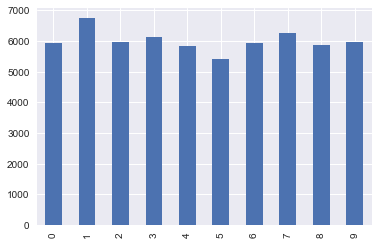

In [19]:
pd.Series(yy_train).value_counts().sort_index().plot.bar()

**Figure**: Training data's label distribution.

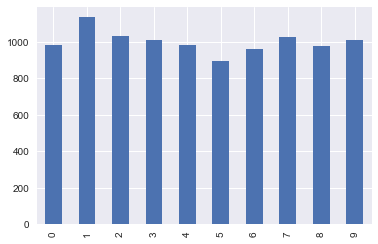

In [20]:
pd.Series(yy_test).value_counts().sort_index().plot.bar()

**Figure**: Test data's label distribution.

### Modeling
In this section, we will start with building a simple convolutional nerual network in keras.

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

set constant random seed to make the result reputable.

In [31]:
seed = 861001
np.random.seed(861001)

In [34]:
xx_train = xx_train.reshape(xx_train.shape[0], 1, 28, 28)
xx_test = xx_test.reshape(xx_test.shape[0], 1, 28, 28)

In [36]:
# normalize inputs from 0-255 to 0-1
xx_train = xx_train / 255
xx_test = xx_test / 255

In [44]:
# one hoe encode outputs
yy_train = np_utils.to_categorical(yy_train)
yy_test = np_utils.to_categorical(yy_test)
num_class = yy_test.shape[1]

In [46]:
num_class

10

In [10]:
def base_convnet():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), 
              input_shape=(1, 28, 28), 
              activation='relu'))
   #  model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    #model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='softmax'))
    model.add(Dense())
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [ ]:
model = base_convnet
model.fit(xx_train, yy_train, xx_test, xx_information
         )